# ODE solver

This notebook contains

- Euler's method

- 2nd order Runke-Kutta method

- 4th order Runge-Kutta method

$ f^{n+1} = f(x^{n+1}) = f(x^n+\Delta x) $


In [7]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
#style.available
style.use('seaborn-v0_8-darkgrid')

## Euler's method

First order difference approximation.

$$ \frac{f^{n+1}-f^n}{\Delta x} = \dot{f}^n +  \mathcal{O}(\Delta x) $$

$$ f^{n+1} = f^n + \Delta x\dot{f}^n +  \mathcal{O}(\Delta x^2) $$

When we have multiple coupled first order differential equations, we can collect them in a vector $\vec{f}$. Applying Euler's method to this $\vec{f}$ directly applies the method on its components as well.

### Simple pendulum



In the case of a simple pendulum with angle $\theta$ and angular velocity $\omega$

$$ \vec{a} = \begin{bmatrix} \theta \\ \omega \end{bmatrix} $$

$$ \dot{\vec{a}} = \begin{bmatrix} \dot{\theta} \\ \dot{\omega} \end{bmatrix} = \begin{bmatrix} \omega \\ -\frac{g}{L}\sin(\theta) \end{bmatrix} $$

$$ \frac{a^{n+1}-a^n}{\tau} = \dot{a}^n + \mathcal{O} (\tau) $$

$$ a^{n+1} = a^n + \tau \dot{a}^n + \mathcal{O}\left(\tau^2\right) $$

$$ \begin{bmatrix} \theta \\ \omega \end{bmatrix} ^{n+1} = \begin{bmatrix} \theta \\ \omega \end{bmatrix} ^{n} + \tau \begin{bmatrix} \omega \\ -\frac{g}{L}\sin(\theta) \end{bmatrix} ^{n} + \mathcal{O}\left(\tau^2\right) $$

$$ \begin{bmatrix} \theta^{n+1} \\ \omega^{n+1} \end{bmatrix} = \begin{bmatrix} \theta ^{n} \\ \omega ^{n} \end{bmatrix} + \tau \begin{bmatrix} \omega ^{n} \\ -\frac{g}{L}\sin(\theta ^{n}) \end{bmatrix} + \mathcal{O}\left(\tau^2\right) $$

In [8]:
class SimplePendulum:
    """ Manage and integrate a simple pendulum """

    def __init__(self, theta0, g=9.81, L=9.81, method="Euler"):
        """ We'll take theta0 in degrees and assume that the angular
        velocity is initially 0 """
        
        # Initial condition
        self.theta0 = np.radians(theta0)

        self.g = g
        self.L = L

    def rhs(self, theta, omega):
        """ Equations of motion for a pendulum
              dtheta/dt = omega
              domega/dt = - (g/L) sin theta """

        return np.array([omega, -(self.g / self.L) * np.sin(theta)])

    def integrate_euler(self, dt, tmax):
        """ Integrate the equations of motion using Euler's method """

        # Initial conditions
        t = 0.0

        t_s = [t]
        theta_s = [self.theta0]
        omega_s = [0.0]

        while t < tmax:

            # Initial state
            theta = theta_s[-1]
            omega = omega_s[-1]
            
            # Get the RHS
            thetadot, omegadot = self.rhs(theta, omega)

            # Advance
            theta_new = theta + dt * thetadot
            omega_new = omega + dt * omegadot

            t += dt

            # Store
            t_s.append(t)
            theta_s.append(theta_new)
            omega_s.append(omega_new)

        return np.array(t_s), np.array(theta_s), np.array(omega_s)

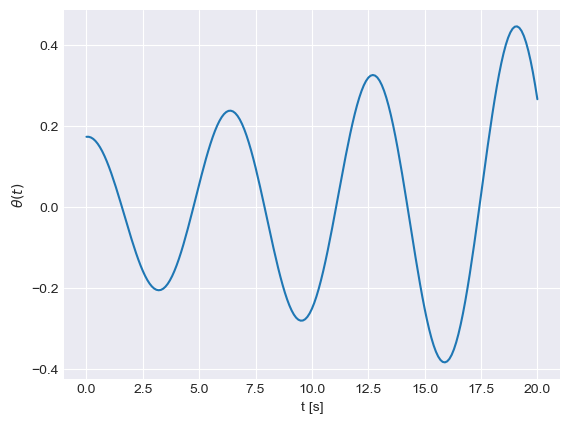

In [13]:
theta0  = 10 # initial angle in degrees -- the class converts to radians
dt      = 0.1
tmax    = 20

p10 = SimplePendulum(theta0)
t_euler, theta_euler, omega_euler = p10.integrate_euler(dt, tmax)

fig, ax = plt.subplots()
ax.plot(t_euler, theta_euler, label="Euler")
ax.set_xlabel("t [s]")
ax.set_ylabel(r"$\theta(t)$");